<a href="https://colab.research.google.com/github/kolinalina/RegresiCovid/blob/main/REGRESI_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **REGRESI - SLR - dataset data_covid_19**

In [25]:
import urllib
import numpy as np
from scipy.optimize import differential_evolution
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set()

In [27]:
# url = "https://storage.googleapis.com/kagglesdsdata/datasets%2F693956%2F1284280%2Fcovid_19_indonesia_time_series_all.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1593593606&Signature=oIePZz7m6RsGyPEn%2FKNXintnBq4bD4gf%2B309jyVthVa1olLlHbW9hyUMPtrlB%2FsHVmlh40dOw5nc%2BGFw2FXfEzrj2gNb3JJTbwo9gOz5O5Veyk5JBTwHKHOKI7TNJSsgOabuhBc%2B9uNVIAY4eRfKTRwLKolPmDw44gs8OgVtNiI1T4rhPGjeLLoRnmFXEmX4axdYL0BcYlPh%2Bx4ts87W4qKt94eeovyAj7IJKABtNKoQqWG3O845153SM1Gp3XP4IKiWJp8y%2Fpr12kg0Nhq2974yAI3mxpqjnunePArWvKPxnEIc6yyUWYUcYgWjwEv71MGMuLqk9oMEZw%2B87BnRNw%3D%3D"
# urllib.request.urlretrieve(url, "covid_19_indonesia.csv")
# raw_df = pd.read_csv("covid_19_indonesia.csv")

In [29]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_indonesia.csv to covid_19_indonesia.csv


In [30]:
raw_df = pd.read_csv('covid_19_indonesia.csv')

In [31]:
raw_df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,3,0,0,3,3,0,0,3,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.28,0.28,0.0,0.0,0.00%,0.00%,NaN,NaN
1,3/1/2020,ID-JB,Jawa Barat,3,0,0,3,3,0,0,3,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.07,0.07,0.0,0.0,0.00%,0.00%,NaN,NaN
2,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,5,0,0,5,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,0.46,0.0,0.0,0.00%,0.00%,0.67,1.0
3,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.0,0.00%,0.00%,NaN,NaN
4,3/2/2020,ID-JB,Jawa Barat,0,0,0,0,3,0,0,3,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.00,0.07,0.0,0.0,0.00%,0.00%,0.00,1.0


In [32]:
drop_cols = ['Date', 'Location ISO Code', 'New Cases', 'New Deaths', 'New Recovered',
             'New Active Cases', 'City or Regency', 'Time Zone', 'Special Status',
             'Total Regencies', 'Total Cities', 'Total Districts', 'Total Urban Villages',
             'Total Rural Villages', 'Area (km2)', 'Population', 'Population Density',
             'Longitude', 'Latitude', 'New Cases per Million', 'Total Cases per Million',
             'New Deaths per Million', 'Total Deaths per Million', 'Case Fatality Rate',
             'Case Recovered Rate', 'Growth Factor of New Cases', 'Growth Factor of New Deaths',
             'Country', 'Continent', 'Province', 'Location Level', 'Location']
raw_df = raw_df.drop(drop_cols, axis=1)

In [33]:
raw_df.head()

,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Island
0,3,0,0,3,Jawa
1,3,0,0,3,Jawa
2,5,0,0,5,Jawa
3,2,0,0,2,NaN
4,3,0,0,3,Jawa


In [34]:
missing = raw_df.isnull().sum()
missing

Total Cases             0
Total Deaths            0
Total Recovered         0
Total Active Cases      0
Island                118
dtype: int64

In [35]:
raw_df = raw_df.fillna('Combination')

In [36]:
raw_df.rename(columns={'Total Cases':'TotalCases', 'Total Deaths':'TotalDeaths', 
                       'Total Recovered':'TotalRecovered', 'Total Active Cases':'TotalActiveCases'}, inplace=True)

In [ ]:
from google.colab import files
raw_df.to_csv('dataCovidIndonesia.csv') 
files.download('dataCovidIndonesia.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
raw_df.shape

(3362, 5)

In [38]:
import statsmodels.api as sm
from scipy.stats import pearsonr

In [39]:
y=raw_df['TotalDeaths']
def Reverse(lst):
    return [ele for ele in reversed(lst)]
y=Reverse(y)
x1=raw_df['TotalCases']
x1=Reverse(x1)

#use pearson correlation(Karl Pearson)
#to strength the linear data - 2 samples
corr, _ = pearsonr(x1, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.989


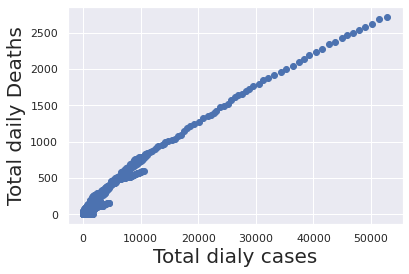

In [40]:
# Exploring the Data
plt.scatter(x1, y)
plt.xlabel("Total dialy cases",fontsize = 20)
plt.ylabel("Total daily Deaths",fontsize = 20)
plt.show()

In [ ]:
# OLS - for “ordinary least squares” method

x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.478e+05
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        06:33:40   Log-Likelihood:                -16819.
No. Observations:                3362   AIC:                         3.364e+04
Df Residuals:                    3360   BIC:                         3.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3001      0.641      6.713      0.0

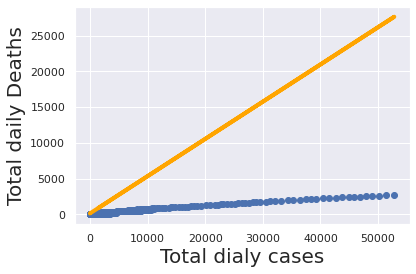

In [ ]:
# Plotting the Regression line
plt.scatter(x1, y)
yhat = [0.5205 * i + 137.2966 for i in x1]
fig = plt.plot(x1, yhat, lw=4, c="orange", label = "regressionline")
plt.xlabel("Total dialy cases", fontsize = 20)
plt.ylabel("Total daily Deaths", fontsize = 20)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb077121be0>,
      dtype=object)

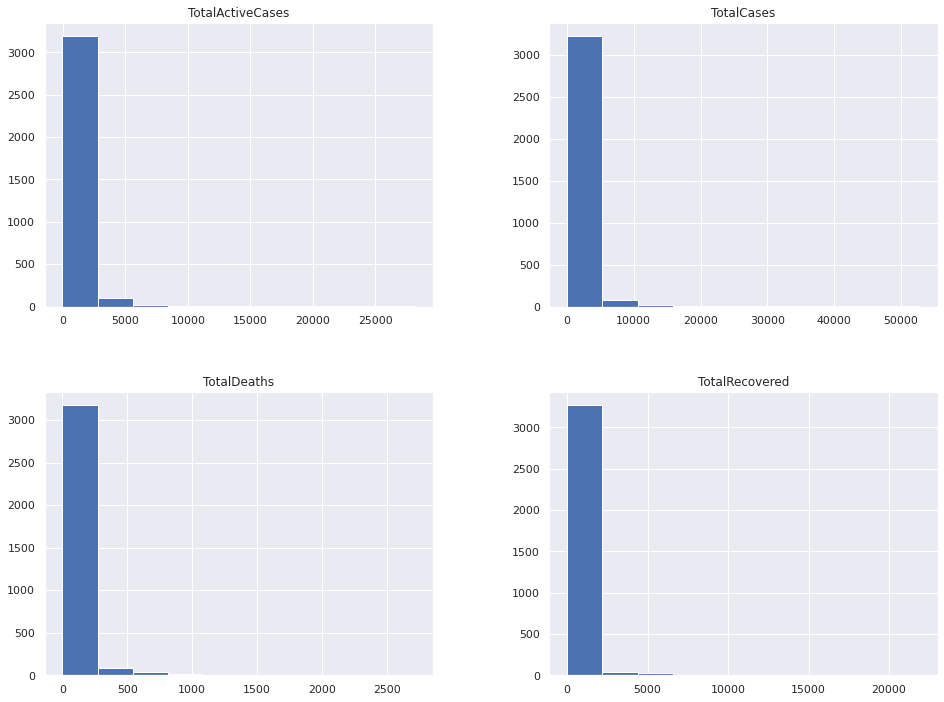

In [ ]:
raw_df.hist(figsize=(16,12))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


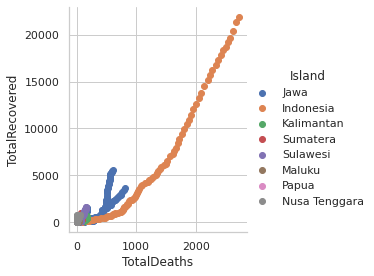

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(raw_df, hue="Island", size=4) \
   .map(plt.scatter, "TotalDeaths", "TotalRecovered") \
   .add_legend()
plt.show()

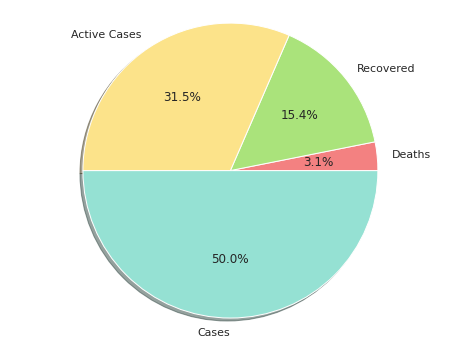

In [ ]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Cases','Deaths','Recovered', 'Active Cases'
sizes = [sum(raw_df['TotalCases']),
         sum(raw_df['TotalDeaths']),
         sum(raw_df['TotalRecovered']),
         sum(raw_df['TotalActiveCases'])]
colors = ['#95E1D3', '#F38181', '#AAE37B','#FCE38A']
explode = (0, 0,0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

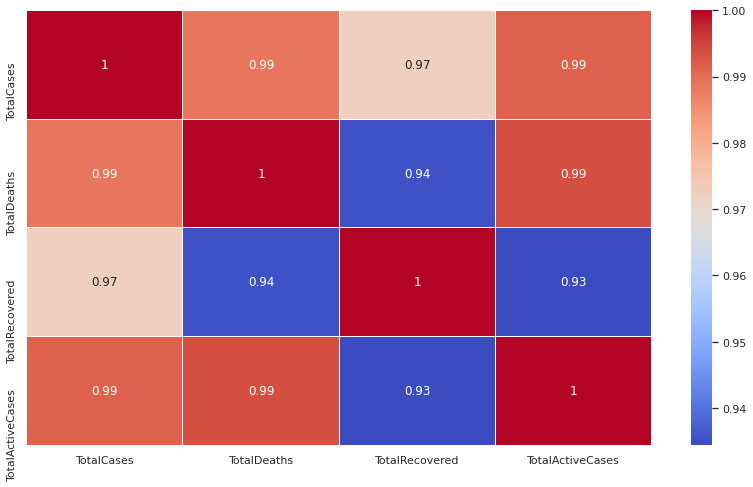

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(raw_df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()